In [1]:
#共通前処理

import warnings
warnings.filterwarnings('ignore')

#共通ライブラリ
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib


#データフレームを表示するやつ
from IPython.display import display

#表示オプションの調整
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format

pd.set_option('display.max_columns', None)

#グラフフォントの設定
plt.rcParams['font.size'] = 14

#乱数
random_seed = 123

ダウンロードをしてきたBike-Sharing-Datasetからcsvファイルを  
データフレームへ取り込む

In [3]:
#データの取り込み
df = pd.read_csv(r'C:\Users\shoni\Downloads\Bike-Sharing-Dataset\day.csv', parse_dates=[1])

In [4]:
#投入したデータフレームの加工

#0列のinstantは不要なので削除する
df = df.drop('instant', axis=1)

#項目名の日本語化

columns = [
    '日付',  '季節',  '年', '月', '祝日', '曜日', '勤務日', '天気', 
    '気温', '体感温度',  '湿度', '風速',
    '臨時ユーザー利用数', '登録ユーザー利用数', '全体ユーザー利用数'
]

#項目名の置き換え
df.columns = columns

In [21]:
#データの確認
display(df.head(30))
display(df.tail())

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1,0.2043,0.2332,0.5183,0.0896,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,2,0.1965,0.2088,0.4987,0.1687,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,2,0.1650,0.1623,0.5358,0.2668,68,891,959
8,2011-01-09,1,0,1,0,0,0,1,0.1383,0.1162,0.4342,0.3619,54,768,822
9,2011-01-10,1,0,1,0,1,1,1,0.1508,0.1509,0.4829,0.2233,41,1280,1321


,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


データのロードからデータの中身の確認が終わったので  
データの前処理とデータの分割

In [7]:
#prophet用に列名を置き換える
#日付と登録ユーザ利用数のみを抽出
#項目列名の名前を変更する

#今回の時系列分析では項目は少ない
#必要な情報は「日付のデータ」と「目的となる登録ユーザ利用数」

#データフレームのコピー
df2 = df.copy()

#日付と登録ユーザー利用数だけを抽出する
df2 = df2[['日付','登録ユーザー利用数']]

#列名を置き換える
df2.columns = ['ds', 'y']

display(df2.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [8]:
#訓練データと検証データへの分割

#2012年11月1日を区切り位置とし、その日の前後で訓練データと検証データの分割を行う

#分割する基準日を変数へ入れる
mday = pd.to_datetime('2012-11-1')

#訓練indexと検証indexを作成
train_index = df2['ds'] < mday
test_index = df2['ds'] >= mday

#もとデータを訓練用と検証用で分割する
x_train = df2[train_index]
x_test = df2[test_index]

#日付データの分割(グラフ表示用)
dates_test = df2['ds'][test_index]


データの分割までが完了したので  
アルゴリズムの選択へ移る

In [9]:
#prophetというアルゴリズムを使用する

#ライブラリのインポート
from fbprophet import Prophet

#パラメータは3つある
#weekとdayのパラメータは数値で指定するとことも可能
#seasonality_modeは加算か乗算かのどちらかを指定する。デフォルトは加算

m1 = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, 
            seasonality_mode='multiplicative')

In [10]:
#モデルの指定が完了したので学習

m1.fit(x_train)

In [12]:
#予測用データの作成
#日付だけが入った配列を作成する
#パラメータperiodsには予測したい日数を指定する
#freqは日付の間隔。Dは1日単位という意味
future1 = m1.make_future_dataframe(periods=61, freq='D')

#結果
display(future1.head())
display(future1.tail())

,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


In [13]:
#準備ができたので予測する
fcst1 = m1.predict(future1)

学習まで完了したので評価へ移る

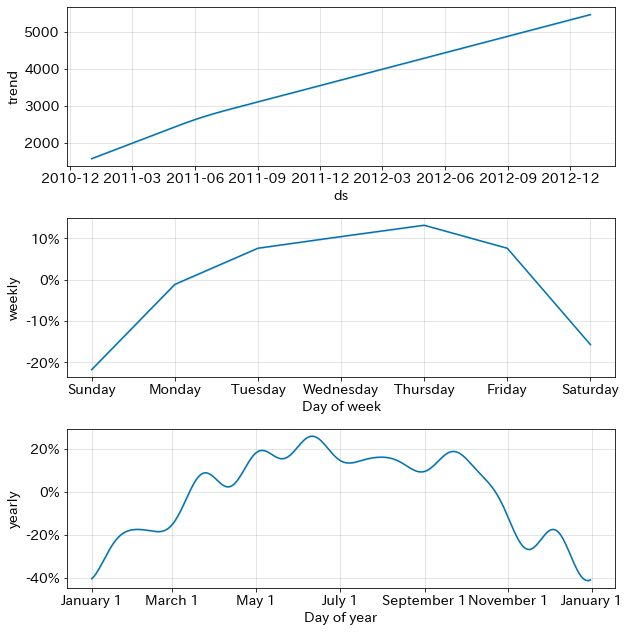

In [14]:
#要素ごとのグラフ描画
#トレンド、週周期、年周期
fig = m1.plot_components(fcst1)
plt.show()


#トレンドを見ると利用者数が増えてきているのがわかる
#週単位では平日に多く利用されているのがわかる
#年単位では暖かくなるにつれて使用者が植えていることがわかる

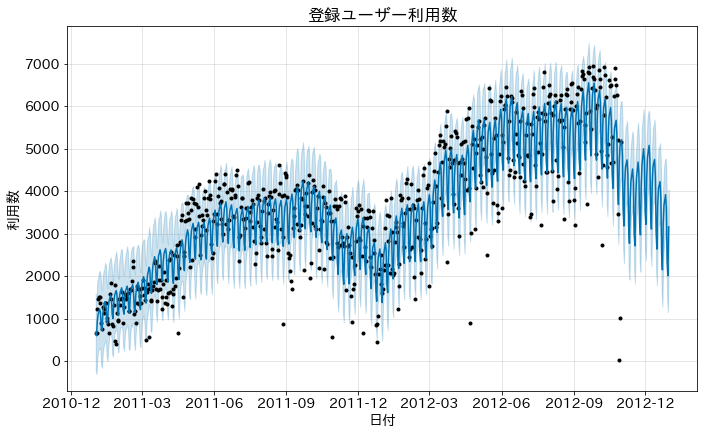

In [15]:
#訓練データ、検証データ両方を含んだもののグラフ化
fig, ax = plt.subplots(figsize=(10,6))

#予測結果のグラフ表示(prophetの関数)
m1.plot(fcst1, ax = ax)

#タイトルの設定など
ax.set_title('登録ユーザー利用数')
ax.set_xlabel('日付')
ax.set_ylabel('利用数')

#グラフ表示
plt.show()

#グラフの説明
#濃い青の曲線：最も確率の高い値の範囲
#薄い青の曲線:信頼区間の範囲
#黒い点は実際の正解データ
#薄い青の曲線から外れているのはつまり予測に失敗している
#失敗した部分についてはチューニングで考慮する

In [16]:
#R2値の計算
#y_pred1にfcst1から予測分だけを抽出し変数に入れる
#yhatは予測結果の中央値
y_pred1 = fcst1[-61:][['yhat']].values

#y_test1に予測期間中の正解データを入れる
y_test1 = x_test['y'].values

#R2の計算
from sklearn.metrics import r2_score
score = r2_score(y_test1,y_pred1)

#結果
print(f'R2 score: {score:.4f}')


R2 score: 0.3734


予測期間中のグラフを表示する(正解データと予測結果)

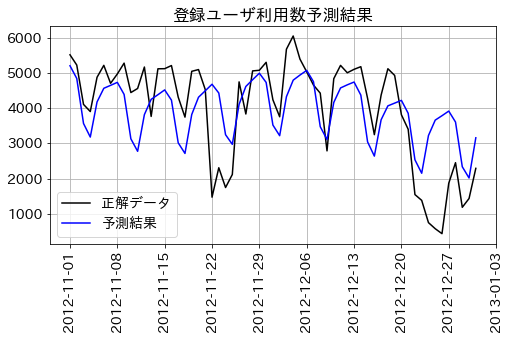

In [18]:
#時系列グラフの表示
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8,4))

#グラフの描画
ax.plot(dates_test, y_test1, label='正解データ', c='k')
ax.plot(dates_test, y_pred1, label='予測結果', c='b')

#目盛の指定
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#日付を90度回転させる
ax.tick_params(axis='x', rotation=90)

#方眼表示
#凡例表示
ax.grid()
ax.legend()
ax.set_title('登録ユーザ利用数予測結果')

#出力
plt.show()

評価までが完了したのでチューニングへ移る  
<br>
ステップとして休日祝日を説明変数(入力データとして追加する)

In [19]:
#祝日の抽出
#祝日のらんが1となっているものを抽出
df_holiday = df[df['祝日']==1]
holidays = df_holiday['日付'].values

#データフレームの形式に変換する
df_add = pd.DataFrame({
    'holiday':'holi',
    'ds':holidays,
    'lower_window':0,
    'upper_window':0
})

#結果確認
display(df_add.head())
display(df_add.tail())

,holiday,ds,lower_window,upper_window
0,holi,2011-01-17,0,0
1,holi,2011-02-21,0,0
2,holi,2011-04-15,0,0
3,holi,2011-05-30,0,0
4,holi,2011-07-04,0,0


,holiday,ds,lower_window,upper_window
16,holi,2012-09-03,0,0
17,holi,2012-10-08,0,0
18,holi,2012-11-12,0,0
19,holi,2012-11-22,0,0
20,holi,2012-12-25,0,0


In [22]:
#休日をモデルの入力でーた(説明変数)とする

#アルゴリズムの選定
#パラメータにholidaysを追加する
m2 = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
            holidays=df_add, seasonality_mode='multiplicative')

#学習
m2 = m2.fit(x_train)

#予測
fcst2 = m2.predict(future1)

以下からステップ1の評価

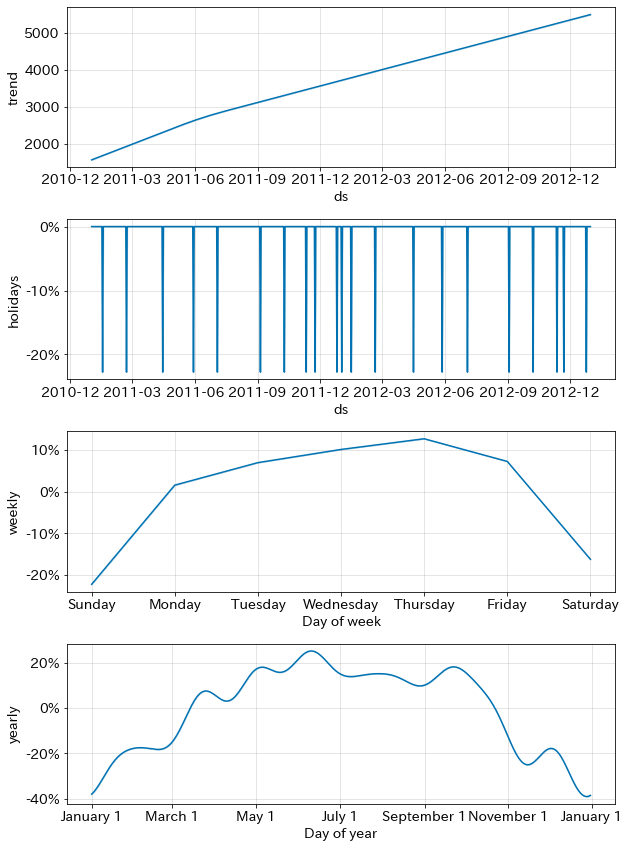

In [23]:
#要素ごとのグラフ描画
#トレンド、週周期、年周期
fig2 = m2.plot_components(fcst2)
plt.show()

#結果holidaysはマイナスな結果となっており、マイナスな影響があると考える
#もともと土日の利用者少ないし妥当ではないか

In [25]:
#R2の計算

y_pred2 = fcst2[-61:][['yhat']].values

score2 = r2_score(y_test1,y_pred2)

#結果
r2_test2 = f'R2 score:{score2:.4f}'
print(r2_test2)

R2 score:0.4145


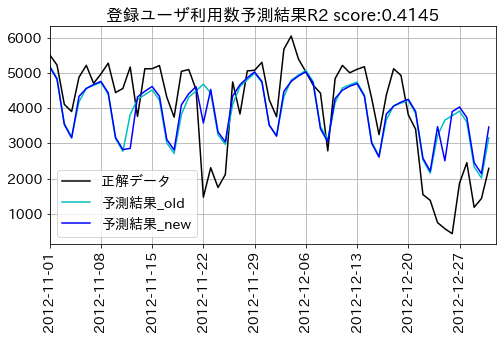

In [31]:
#時系列グラフの描画
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8,4))

#グラフ描画
ax.plot(dates_test, y_test1, label='正解データ', c='k')
ax.plot(dates_test, y_pred1, label='予測結果_old', c='c')
ax.plot(dates_test, y_pred2, label='予測結果_new', c='b')

#目盛の指定
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#日付の表記
ax.tick_params(axis='x', rotation=90)

#開始と終了
sday = pd.to_datetime('2012-11-1')
eday = pd.to_datetime('2013-1-1')
ax.set_xlim(sday, eday)

#方眼表示とか
ax.grid()
ax.legend()
ax.set_title('登録ユーザ利用数予測結果' + r2_test2)

plt.show()

ここまででチューニングステップ1が完了  
ここからチューニングステップ2に移る

In [32]:
#チューニング1のモデルにさらに天気、気温、風速、湿度を追加する

#項目追加したものをdf3という変数に入れる
#予測用のデータを作成する
df3 = pd.concat([df2, df[['天気', '気温', '風速', '湿度']]], axis=1)

#入力データの分割
x2_train = df3[train_index]
x2_test = df3[test_index]

#結果
display(x2_train.tail())

,ds,y,天気,気温,風速,湿度
665,2012-10-27,5209,2,0.5300,0.2357,0.7200
666,2012-10-28,3461,2,0.4775,0.3980,0.6946
667,2012-10-29,20,3,0.4400,0.3582,0.8800
668,2012-10-30,1009,2,0.3182,0.2130,0.8255
669,2012-10-31,5147,2,0.3575,0.1667,0.6667


In [33]:
#データの準備ができたので学習

#モデルの定義、初期化
m3 = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
            seasonality_mode='multiplicative', holidays=df_add)

#add_regressor関数で天気とかを追加してモデルに入れる
m3.add_regressor('天気')
m3.add_regressor('気温')
m3.add_regressor('風速')
m3.add_regressor('湿度')

#学習
m3.fit(x2_train)

In [34]:
#学習が完了したので予測
future3 = df3[['ds', '天気', '気温', '風速', '湿度']]

#予測
fcst3 = m3.predict(future3)


予測までが完了したので評価へ移る

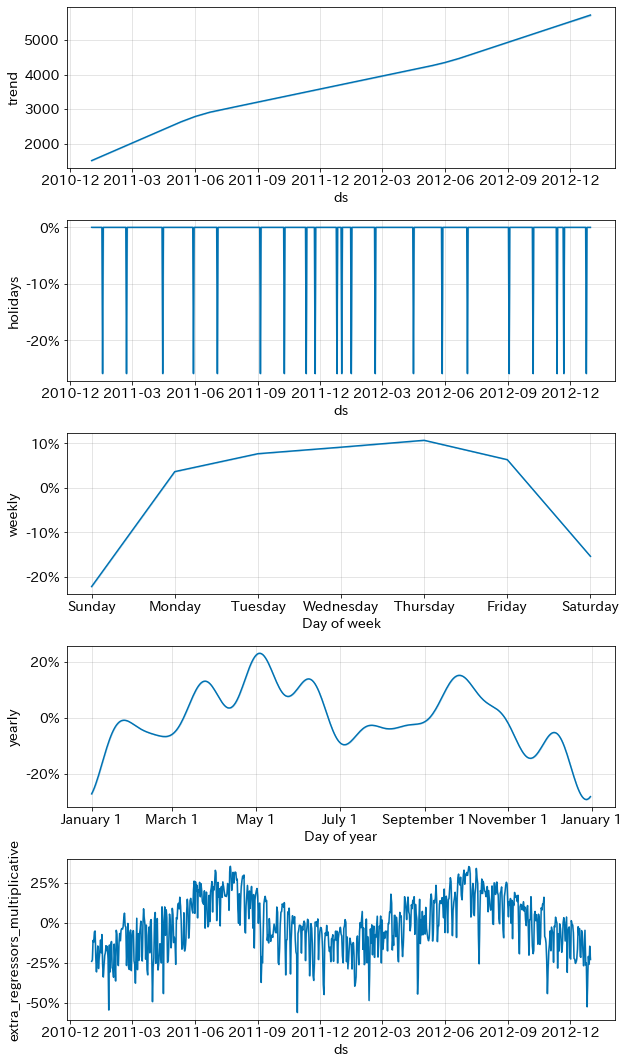

In [36]:
#要素ごとのグラフ描画
fig = m3.plot_components(fcst3)
plt.show()

In [37]:
#R2の計算

y_pred3 = fcst3[-61:][['yhat']].values
score3 = r2_score(y_test1, y_pred3)

#結果
r2_test3 = f'R2 score:{score3:.4f}'
print(r2_test3)

R2 score:0.6196


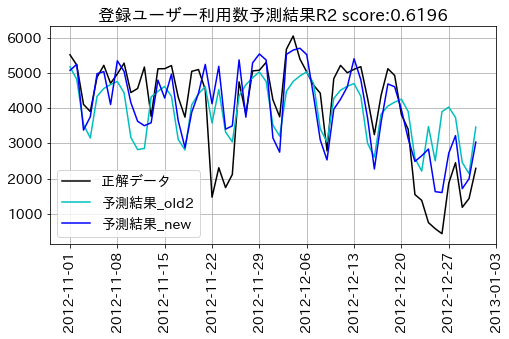

In [41]:
#時系列グラフの描画
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

#グラフ描画
ax.plot(dates_test, y_test1, label='正解データ', c='k')
ax.plot(dates_test, y_pred2, label='予測結果_old2', c='c')
ax.plot(dates_test, y_pred3, label='予測結果_new', c='b')

#目盛の間隔
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

ax.tick_params(axis='x', rotation=90)

ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測結果' + r2_test3)

plt.show()